****Detecting if pearson have heart failure or he is noraml using ECG images *****

this data set contain 4 classes 
1)Myocardial infarction (MI)
2)History of Myocardial Infarction (HMI)
3)Abnormal Heart Beats (AHB)
4)Noraml Heart Beats (NHB)

In [1]:

import os
for dirname, _, filenames in os.walk('ECG'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(1).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(10).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(100).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(101).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(102).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(103).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(104).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(105).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(106).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(107).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(108).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(109).jpg
ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(11).jpg
ECG\ECG Images of Myocardial 

In [2]:
#import needed libirares 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [3]:
from tensorflow.keras.utils import load_img,img_to_array

2024-03-29 16:45:32.089788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-29 16:45:32.089976: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#read training data
np.random.seed(1234)
path='train'
img_list=os.listdir(path)
lables=[i for i in range(len(img_list))]
label_dict=dict()
label_dict['ECG Images of Myocardial Infarction Patients (240x12=2880)']= 0
label_dict['ECG Images of Patient that have History of MI (172x12=2064)']= 1
label_dict['ECG Images of Patient that have abnormal heartbeat (233x12=2796)']= 2
label_dict['Normal Person ECG Images (284x12=3408)']= 3
data=[]
label=[]
C=0
for cat in img_list:
    C=0
    pic_list=os.path.join(path,cat)
    for img in  os.listdir(pic_list):
        image=os.path.join(pic_list,img)
        #print(image)
        image=cv2.imread(image)
        #image=procssing(image) 
        #image=cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        #image=img_to_array(image)
        data.append(image)
        label.append(label_dict[cat])
        C+=1
    print(C)

239
233
172
284


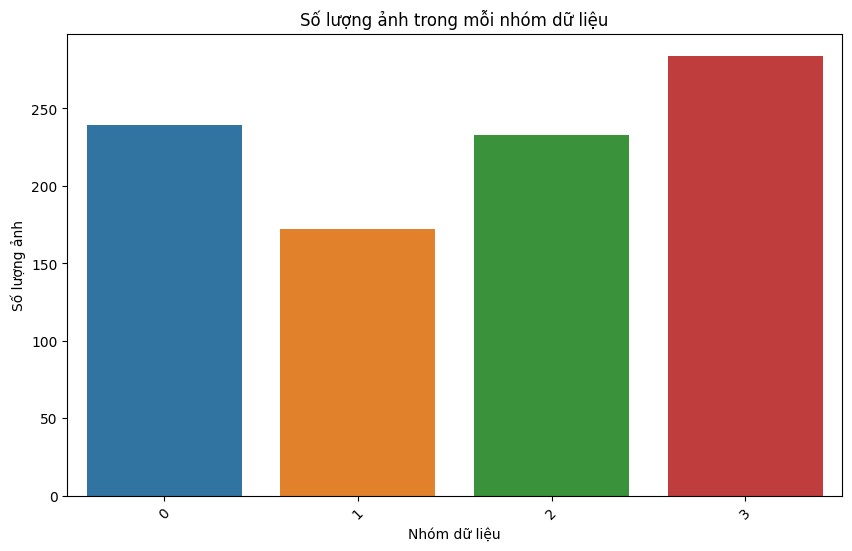

In [4]:
# Thay đổi nhãn nhóm dữ liệu
label_dict = {
    'Myocardial Infarction': 'Myocardial Infarction',
    'Abnormal Heart Beat': 'Abnormal Heart Beat',
    'Have a History of Myocardial Infraction': 'Have a History of Myocardial Infraction',
    'Normal Heart': 'Normal Heart',
}

# Đếm số lượng ảnh trong từng nhóm dữ liệu
from collections import Counter
label_counter = Counter(label)

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counter.keys()), y=list(label_counter.values()))
plt.title('Số lượng ảnh trong mỗi nhóm dữ liệu')
plt.xlabel('Nhóm dữ liệu')
plt.ylabel('Số lượng ảnh')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

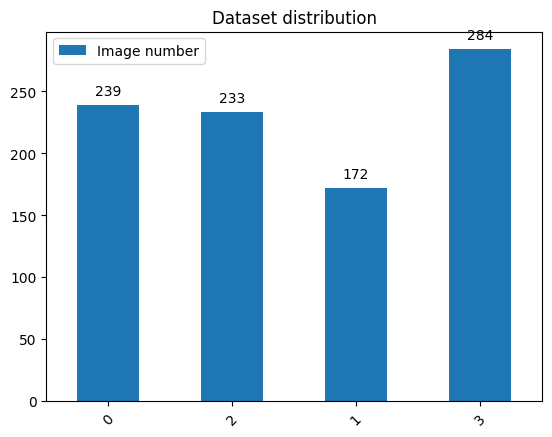

In [5]:
import pandas as pd

# Tạo DataFrame từ Counter
label_counts = pd.DataFrame.from_dict(label_counter, orient='index', columns=['Image number'])

# Tạo biểu đồ cột với nhãn nhóm dữ liệu giống như khai báo
plt.figure(figsize=(10, 6))
ax = label_counts.plot(kind='bar', title="Dataset distribution")

# Hiển thị số lượng trên từng cột
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Dataset distribution')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

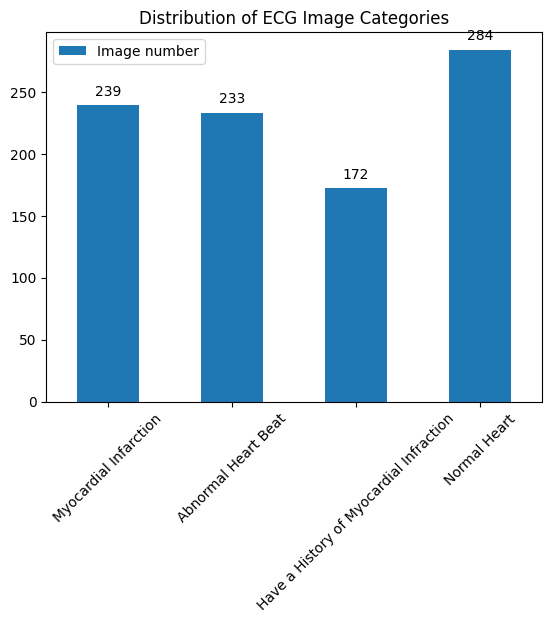

In [7]:
import pandas as pd

# Tạo DataFrame từ Counter
label_counts = pd.DataFrame.from_dict(label_counter, orient='index', columns=['Image number'])

# Thay đổi nhãn nhóm dữ liệu
label_counts.index = ['Myocardial Infarction', 'Abnormal Heart Beat', 'Have a History of Myocardial Infraction', 'Normal Heart']

# Tạo biểu đồ cột với nhãn nhóm dữ liệu giống như khai báo
plt.figure(figsize=(10, 6))
ax = label_counts.plot(kind='bar', title="Dataset distribution")

# Hiển thị số lượng trên từng cột
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of ECG Image Categories')
plt.xticks(rotation=45)
plt.show()


In [5]:
data=np.array(data)
data.shape

(928, 224, 224, 3)

In [6]:
label=np.array(label)
label.shape

(928,)

In [7]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3

In [8]:
from tensorflow.keras.utils import to_categorical

num_classes = 5
label = to_categorical(label, num_classes)


In [9]:
model=EfficientNetB0(include_top=True,weights=None,input_shape=(224,224,3),classes=5)
model.summary()

2024-03-08 01:13:10.334328: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-08 01:13:10.334424: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 01:13:10.334478: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-0MK0TTK): /proc/driver/nvidia/version does not exist
2024-03-08 01:13:10.337345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_a

 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_a

                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1152)  10368       ['block7a_expand_activation[0][0]
 D)       

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001),metrics=['accuracy'])

In [11]:
history=model.fit(data,label,batch_size=32,epochs=100, validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 274s 9s/step - loss: 2.3157 - accuracy: 0.3908 - val_loss: 1.3773 - val_accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 197s 8s/step - loss: 1.4425 - accuracy: 0.5593 - val_loss: 1.6140 - val_accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 214s 9s/step - loss: 1.0667 - accuracy: 0.6375 - val_loss: 1.8950 - val_accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 199s 8s/step - loss: 0.7875 - accuracy: 0.7008 - val_loss: 2.3373 - val_accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 183s 8s/step - loss: 0.6841 - accuracy: 0.7264 - val_loss: 1.7587 - val_accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 184s 8s/step - loss: 0.6187 - accuracy: 0.7790 - val_loss: 2.0818 - val_accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 184s 8s/step - loss: 0.5722 - accuracy: 0.8005 - val_loss: 1.4998 - val

Epoch 58/100
24/24 [==============================] - 263s 11s/step - loss: 0.1102 - accuracy: 0.9650 - val_loss: 1.1411 - val_accuracy: 0.6989
Epoch 59/100
24/24 [==============================] - 223s 9s/step - loss: 0.0919 - accuracy: 0.9623 - val_loss: 1.4203 - val_accuracy: 0.6129
Epoch 60/100
24/24 [==============================] - 183s 8s/step - loss: 0.1338 - accuracy: 0.9690 - val_loss: 1.3232 - val_accuracy: 0.6452
Epoch 61/100
24/24 [==============================] - 183s 8s/step - loss: 0.1139 - accuracy: 0.9596 - val_loss: 1.1014 - val_accuracy: 0.7312
Epoch 62/100
24/24 [==============================] - 190s 8s/step - loss: 0.0851 - accuracy: 0.9717 - val_loss: 1.2998 - val_accuracy: 0.6559
Epoch 63/100
24/24 [==============================] - 180s 8s/step - loss: 0.2123 - accuracy: 0.9407 - val_loss: 3.4676 - val_accuracy: 0.2527
Epoch 64/100
24/24 [==============================] - 183s 8s/step - loss: 0.1589 - accuracy: 0.9501 - val_loss: 1.1704 - val_accuracy: 0.741

In [12]:
np.random.seed(1234)
path_test='test'
img_list_test=os.listdir(path_test)
lables=[i for i in range(len(img_list_test))]
label_dict=dict()
label_dict['ECG Images of Myocardial Infarction Patients (240x12=2880)']= 0
label_dict['ECG Images of Patient that have History of MI (172x12=2064)']= 1
label_dict['ECG Images of Patient that have abnormal heartbeat (233x12=2796)']= 2
label_dict['Normal Person ECG Images (284x12=3408)']= 3
data_test=[]
label_test=[]
C=0
for cat in img_list_test:
    C=0
    pic_list=os.path.join(path_test,cat)
    for img in  os.listdir(pic_list):
        image=os.path.join(pic_list,img)
        #print(image)
        image=cv2.imread(image)
        #image=procssing(image) 
        #image=cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        #image=img_to_array(image)
        data_test.append(image)
        label_test.append(label_dict[cat])
        C+=1
    print(C)

112
112
112
112


In [13]:
data_test=np.array(data_test)
data_test.shape

(448, 224, 224, 3)

In [14]:
label_test=np.array(label_test)
label_test.shape

(448,)

In [15]:
from tensorflow.keras.utils import to_categorical
num_classes = 5
label_test = to_categorical(label_test, num_classes)
label_test.shape

(448, 5)

In [16]:
_, acc = model.evaluate(data_test, label_test)

14/14 [==============================] - 31s 2s/step - loss: 0.5486 - accuracy: 0.8996


In [17]:
y_pred=model.predict(data_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
# Assuming data_test and label_test are correctly prepared and 'model' is already trained

from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report

# Convert one-hot encoded test labels back to class indices for comparison
label_test_indices = np.argmax(label_test, axis=1)

# Evaluate the model on the test data
loss, acc = model.evaluate(data_test, label_test, verbose=0)  # added verbose=0 to reduce log clutter
print(f"Test Accuracy: {acc*100:.2f}%")

# Predict classes with the model
y_pred_prob = model.predict(data_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate a classification report
report = classification_report(label_test_indices, y_pred, target_names=label_dict.keys(), digits=5)
print(report)


Test Accuracy: 89.96%
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)    0.98246   1.00000   0.99115       112
     ECG Images of Patient that have History of MI (172x12=2064)    0.80000   1.00000   0.88889       112
ECG Images of Patient that have abnormal heartbeat (233x12=2796)    0.88189   1.00000   0.93724       112
                          Normal Person ECG Images (284x12=3408)    1.00000   0.59821   0.74860       112

                                                        accuracy                        0.89955       448
                                                       macro avg    0.91609   0.89955   0.89147       448
                                                    weighted avg    0.91609   0.89955   0.89147       448



In [19]:
model.save("MOI.h5")

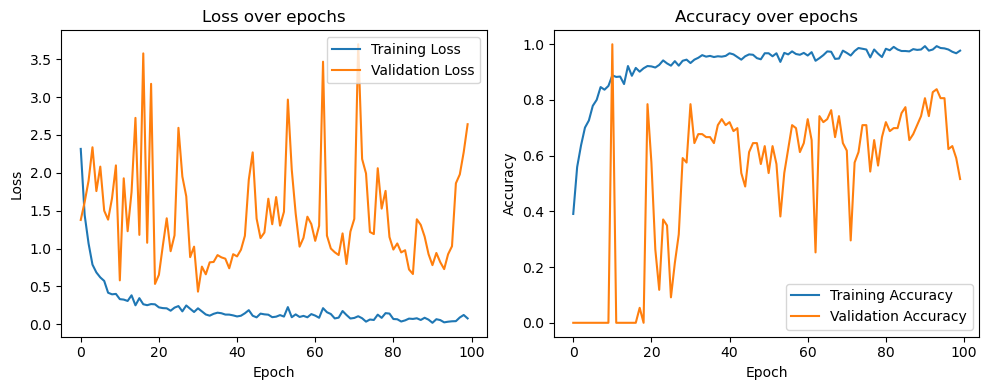

In [20]:
# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

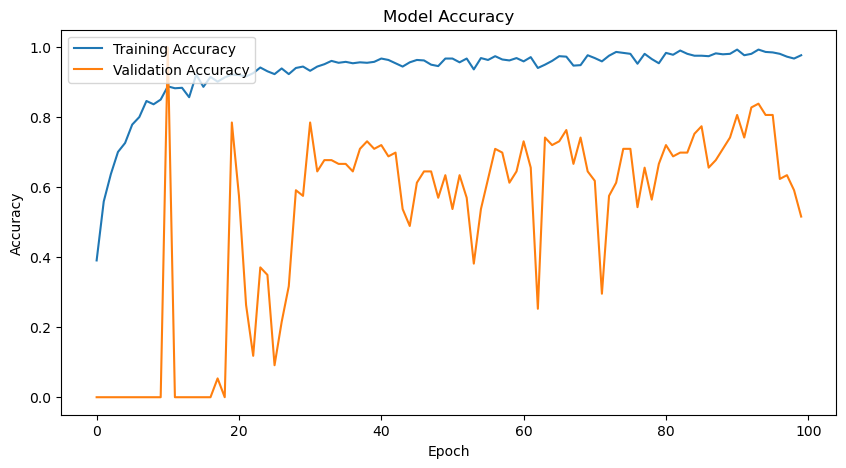

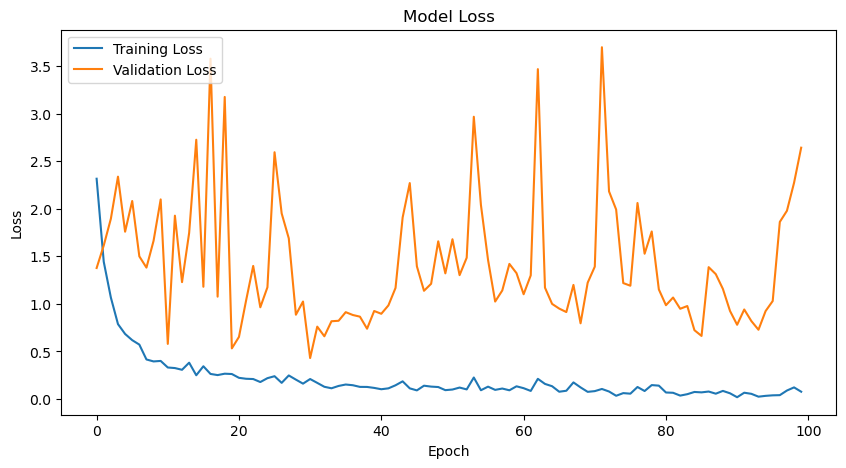

In [21]:
import matplotlib.pyplot as plt

# Vẽ độ chính xác
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Vẽ giá trị mất mát
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Xây dựng mô hình 1DCNN
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(128, 1)),  # Giả sử dữ liệu đầu vào có kích thước là 128x1
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dropout(0.5),  # Sử dụng Dropout để giảm overfitting
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')  # Giả sử có 4 lớp đầu ra
])

# Cấu hình mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra tóm tắt mô hình
model.summary()


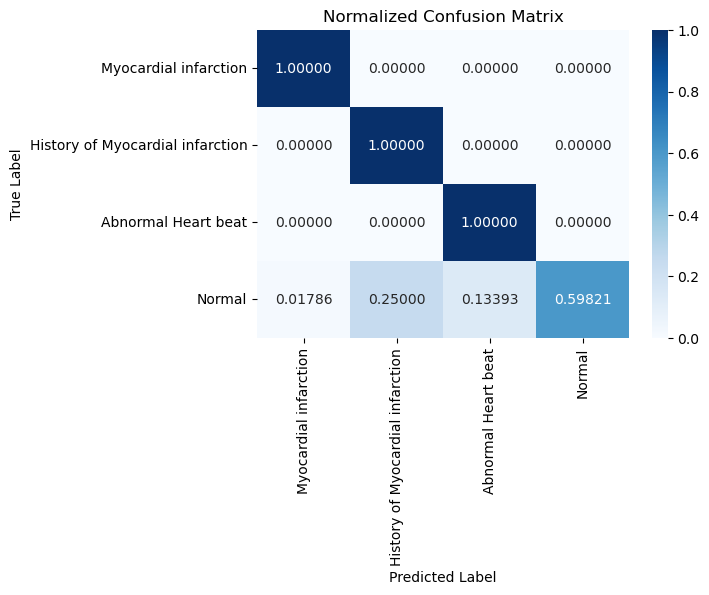

In [24]:
class_labels = ['Myocardial infarction', 'History of Myocardial infarction', 'Abnormal Heart beat', 'Normal']

y_true = np.argmax(label_test, axis=1) # Chuyển one-hot encoding về dạng số nguyên
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis=1)


# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Chuẩn hóa confusion matrix
normalized_cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Vẽ heatmap cho confusion matrix đã chuẩn hóa
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap="Blues", fmt=".5f", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load data
np.random.seed(1234)
path = 'train'
img_list = os.listdir(path)
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data = []
label = []

for cat in img_list:
    pic_list = os.path.join(path, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, (224, 224))
        data.append(image)
        label.append(label_dict[cat])

# Convert lists to arrays
data = np.array(data)
label = np.array(label)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2, random_state=1234)

# Each image is treated as 224 sequences of 224 steps, with 1 feature per step
X_train = X_train.reshape(X_train.shape[0], 224, 224)
X_val = X_val.reshape(X_val.shape[0], 224, 224)

# Update model to reflect the change in input shape
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(224, 224)))  # Adjusted input shape
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

# Load test data
path_test = 'test'
img_list_test = os.listdir(path_test)
data_test = []
label_test = []

for cat in img_list_test:
    pic_list = os.path.join(path_test, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, (224, 224))
        data_test.append(image)
        label_test.append(label_dict[cat])

# Convert lists to arrays
data_test = np.array(data_test)
label_test = np.array(label_test)

# Reshape test data for 1D CNN
data_test = data_test.reshape(data_test.shape[0], data_test.shape[1], data_test.shape[2])

# Evaluate the model on test data
loss, acc = model.evaluate(data_test, label_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# Generate predictions
y_pred = np.argmax(model.predict(data_test), axis=-1)

# Generate classification report
report = classification_report(label_test, y_pred, target_names=label_dict.keys(), digits=5)
print(report)


2024-03-15 12:50:45.236930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-15 12:50:45.238248: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-15 13:11:07.845122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-15 13:11:07.892772: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 13:11:07.913377: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel dri

Epoch 1/200
24/24 [==============================] - 62s 1s/step - loss: 40.6806 - accuracy: 0.2722 - val_loss: 7.7426 - val_accuracy: 0.2957
Epoch 2/200
24/24 [==============================] - 11s 460ms/step - loss: 12.8406 - accuracy: 0.2844 - val_loss: 3.7979 - val_accuracy: 0.2849
Epoch 3/200
24/24 [==============================] - 10s 412ms/step - loss: 7.7474 - accuracy: 0.3019 - val_loss: 2.4738 - val_accuracy: 0.3925
Epoch 4/200
24/24 [==============================] - 11s 450ms/step - loss: 4.2210 - accuracy: 0.3868 - val_loss: 2.1268 - val_accuracy: 0.4624
Epoch 5/200
24/24 [==============================] - 9s 380ms/step - loss: 2.8562 - accuracy: 0.4218 - val_loss: 1.4353 - val_accuracy: 0.6022
Epoch 6/200
24/24 [==============================] - 10s 444ms/step - loss: 2.0783 - accuracy: 0.4825 - val_loss: 1.1549 - val_accuracy: 0.5699
Epoch 7/200
24/24 [==============================] - 8s 346ms/step - loss: 1.7189 - accuracy: 0.5310 - val_loss: 1.2386 - val_accuracy: 0.

Epoch 58/200
24/24 [==============================] - 5s 227ms/step - loss: 0.0511 - accuracy: 0.9852 - val_loss: 0.3092 - val_accuracy: 0.9247
Epoch 59/200
24/24 [==============================] - 6s 261ms/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.4133 - val_accuracy: 0.8925
Epoch 60/200
24/24 [==============================] - 8s 339ms/step - loss: 0.0335 - accuracy: 0.9919 - val_loss: 0.3348 - val_accuracy: 0.9301
Epoch 61/200
24/24 [==============================] - 13s 550ms/step - loss: 0.0275 - accuracy: 0.9933 - val_loss: 0.3408 - val_accuracy: 0.9194
Epoch 62/200
24/24 [==============================] - 6s 237ms/step - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.3388 - val_accuracy: 0.9086
Epoch 63/200
24/24 [==============================] - 8s 316ms/step - loss: 0.0274 - accuracy: 0.9933 - val_loss: 0.3180 - val_accuracy: 0.9247
Epoch 64/200
24/24 [==============================] - 9s 370ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.3185 - val_accuracy

Epoch 115/200
24/24 [==============================] - 4s 172ms/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.4355 - val_accuracy: 0.9086
Epoch 116/200
24/24 [==============================] - 6s 245ms/step - loss: 0.0091 - accuracy: 0.9960 - val_loss: 0.4712 - val_accuracy: 0.9140
Epoch 117/200
24/24 [==============================] - 14s 600ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.3997 - val_accuracy: 0.9140
Epoch 118/200
24/24 [==============================] - 13s 521ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.4043 - val_accuracy: 0.9086
Epoch 119/200
24/24 [==============================] - 12s 495ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.3845 - val_accuracy: 0.9140
Epoch 120/200
24/24 [==============================] - 8s 356ms/step - loss: 0.0166 - accuracy: 0.9933 - val_loss: 0.4514 - val_accuracy: 0.9086
Epoch 121/200
24/24 [==============================] - 8s 343ms/step - loss: 0.1252 - accuracy: 0.9555 - val_loss: 0.8407 - val

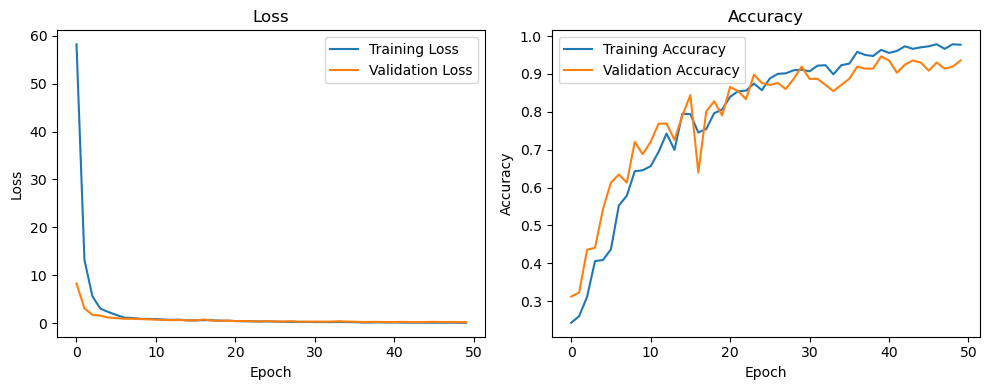

In [8]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

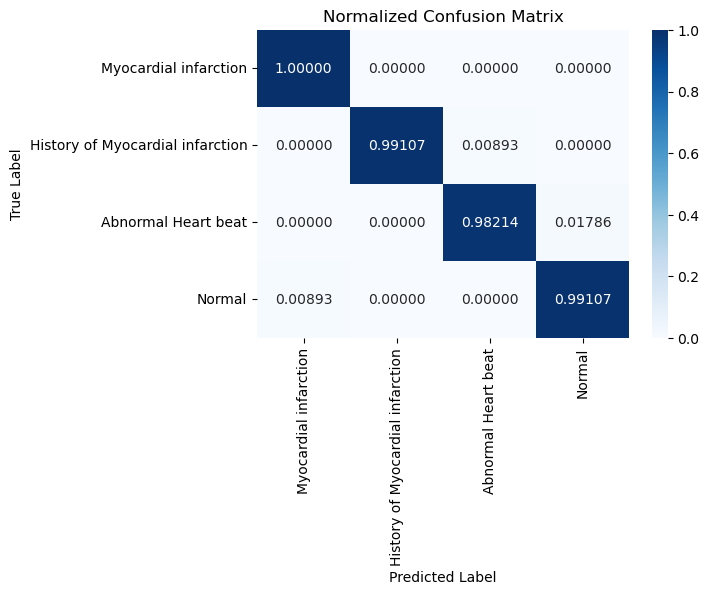

In [6]:

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
# If label_test is already an array of class labels, use it directly
y_true = label_test

# If label_test is one-hot encoded, then you indeed need to convert it
# y_true = np.argmax(label_test, axis=1)  # Uncomment this if label_test is one-hot encoded

# The rest of your code for prediction and plotting remains the same
y_pred = np.argmax(model.predict(data_test), axis=-1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
normalized_cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap="Blues", fmt=".5f", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [7]:
model.save("ECG1D-99.h5")

In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

np.random.seed(1234)
path = 'train'
img_list = os.listdir(path)
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data = []
label = []

# Load and preprocess data
for cat in img_list:
    pic_list = os.path.join(path, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        data.append(image)
        label.append(label_dict[cat])

data = np.array(data).reshape(-1, 224, 224, 1)
label = np.array(label)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2, random_state=1234)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Model architecture adjustments
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)
]

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)


# Load test data
path_test = 'test'
img_list_test = os.listdir(path_test)
data_test = []
label_test = []

for cat in img_list_test:
    pic_list = os.path.join(path_test, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, (224, 224))
        data_test.append(image)
        label_test.append(label_dict[cat])

# Convert lists to arrays
data_test = np.array(data_test)
label_test = np.array(label_test)

# Reshape test data for 1D CNN
data_test = data_test[..., np.newaxis]

# Evaluate the model on test data
loss, acc = model.evaluate(data_test, label_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# Generate predictions
y_pred = np.argmax(model.predict(data_test), axis=-1)

# Generate classification report
report = classification_report(label_test, y_pred, target_names=label_dict.keys(), digits=5)
print(report)


2024-03-14 00:52:29.089663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-14 00:52:29.089751: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-14 00:56:38.113812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-14 00:56:38.114467: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-14 00:56:38.114639: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel dri

Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 2.8038 - accuracy: 0.2736
Epoch 1: val_loss improved from inf to 16.81901, saving model to best_model.h5
24/24 [==============================] - 170s 7s/step - loss: 2.8038 - accuracy: 0.2736 - val_loss: 16.8190 - val_accuracy: 0.2634 - lr: 1.0000e-04
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.4933 - accuracy: 0.3329
Epoch 2: val_loss improved from 16.81901 to 12.83995, saving model to best_model.h5
24/24 [==============================] - 138s 6s/step - loss: 1.4933 - accuracy: 0.3329 - val_loss: 12.8399 - val_accuracy: 0.2634 - lr: 1.0000e-04
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.3597 - accuracy: 0.3437
Epoch 3: val_loss improved from 12.83995 to 11.51416, saving model to best_model.h5
24/24 [==============================] - 126s 5s/step - loss: 1.3597 - accuracy: 0.3437 - val_loss: 11.5142 - val_accuracy: 0.2634 - lr: 1.0000e-04
Epoch 4/50
24/24 [=========

/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Thêm dòng này để nhập TensorFlow


# Đặt seed để đảm bảo tính nhất quán
np.random.seed(1234)
tf.random.set_seed(1234)

# Load data
path = 'train'
categories = os.listdir(path)
label_dict = {cat: idx for idx, cat in enumerate(categories)}

data = []
labels = []

for cat in categories:
    pics_path = os.path.join(path, cat)
    for img_name in os.listdir(pics_path):
        img_path = os.path.join(pics_path, img_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Chuyển thành grayscale
        image = cv2.resize(image, (224, 224))  # Resize ảnh
        image = np.expand_dims(image, axis=-1)  # Thêm một chiều cho kênh màu
        data.append(image)
        labels.append(label_dict[cat])

# Chuyển đổi list thành array
data = np.array(data) / 255.0  # Chuẩn hóa dữ liệu
labels = np.array(labels)

# Split data
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Load test data
path_test = 'test'
img_list_test = os.listdir(path_test)
data_test = []
label_test = []

for cat in img_list_test:
    pic_list = os.path.join(path_test, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, (224, 224))
        data_test.append(image)
        label_test.append(label_dict[cat])

# Convert lists to arrays
data_test = np.array(data_test)
label_test = np.array(label_test)

# Reshape test data for 1D CNN
data_test = data_test.reshape(data_test.shape[0], data_test.shape[1], data_test.shape[2])

# Evaluate the model on test data
loss, acc = model.evaluate(data_test, label_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# Generate predictions
y_pred = np.argmax(model.predict(data_test), axis=-1)

# Generate classification report
report = classification_report(label_test, y_pred, target_names=label_dict.keys(), digits=5)
print(report)


2024-03-16 16:22:22.542170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-16 16:22:22.542338: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-16 16:25:17.255166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ancao/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2024-03-16 16:25:17.255290: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-16 16:25:17.255337: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel dri

Epoch 1/20


2024-03-16 16:25:19.818003: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 177209344 exceeds 10% of free system memory.



 1/24 [>.............................] - ETA: 2:12 - loss: 1.3934 - accuracy: 0.1875